## Saving a Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [8]:
# Make sure we've got the latest version of fastai:
!pip install fastai pandas
!pip install --user kaggle

First, import all the stuff we need from fastai:

In [1]:
from fastai.vision.all import *
ignore_name=['Capris','Churidar','Jeggings','Patiala','Salwar','Salwar and Dupatta','Stockings','Swimwear']
target='Skirts'

Download and decompress our dataset, which is pictures of dogs and cats:

In [ ]:
path = untar_data(URLs.PETS)/'images'
a=get_image_files(path)

In [6]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 99%|███████████████████████████████████████▌| 559M/565M [00:03<00:00, 98.4MB/s]
100%|█████████████████████████████████████████| 565M/565M [00:03<00:00, 152MB/s]


In [2]:
import pandas as pd
from io import StringIO


def count_occurrences(text, substring):
    return text.lower().count(substring.lower())

with open('/kaggle/working/styles.csv','r') as file:
    txt=file.readlines()
    txt2=''
    rmv=[]
    limit=count_occurrences(txt[6044],',')
    for f in range(0,len(txt)):
        if count_occurrences(txt[f],',')>limit:
            rmv.append(f)
    rmv=rmv[::-1]
    print(rmv)
    for f in rmv:
        txt.pop(f)
    for f in txt:
        txt2+=f
df=pd.read_csv(StringIO(txt2))
print(df.head(n=5))


[38403, 38274, 38104, 37769, 35961, 35747, 33019, 31624, 29905, 15075, 14531, 14111, 11944, 11372, 10904, 10426, 10263, 9025, 7938, 7398, 6568, 6043]
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Pum

In [3]:
a=df.loc[lambda df: df['articleType'] =='Skirts']
a=a.iterrows()
skirt=[]
for index, value in a:
    skirt.append(value[0])

In [4]:
ignore_name=['Capris','Churidar','Jeggings','Patiala','Salwar','Salwar and Dupatta','Stockings','Swimwear']

a=df.loc[lambda df: df['subCategory'] =='Bottomwear' ]
a=a.iterrows()
not_skirt=[]
for index, value in a:
    if value[4] not in ignore_name:
        not_skirt.append(value[0])
    

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

In [5]:
def is_skirt(x): 
    for i in skirt:
        if str(i) ==x[:-4]:
            return True
    return False
    

In [158]:

!mkdir bottomwear
import shutil
def copy_file(src):
    for i in src:
        try:
            shutil.copyfile(f"images/{i}.jpg", f"/kaggle/working/bottomwear/{i}.jpg")
        except FileNotFoundError:
            print(f'not copy{i}')
copy_file(skirt)
copy_file(not_skirt)


not copy39401


Now we can create our `DataLoaders`:

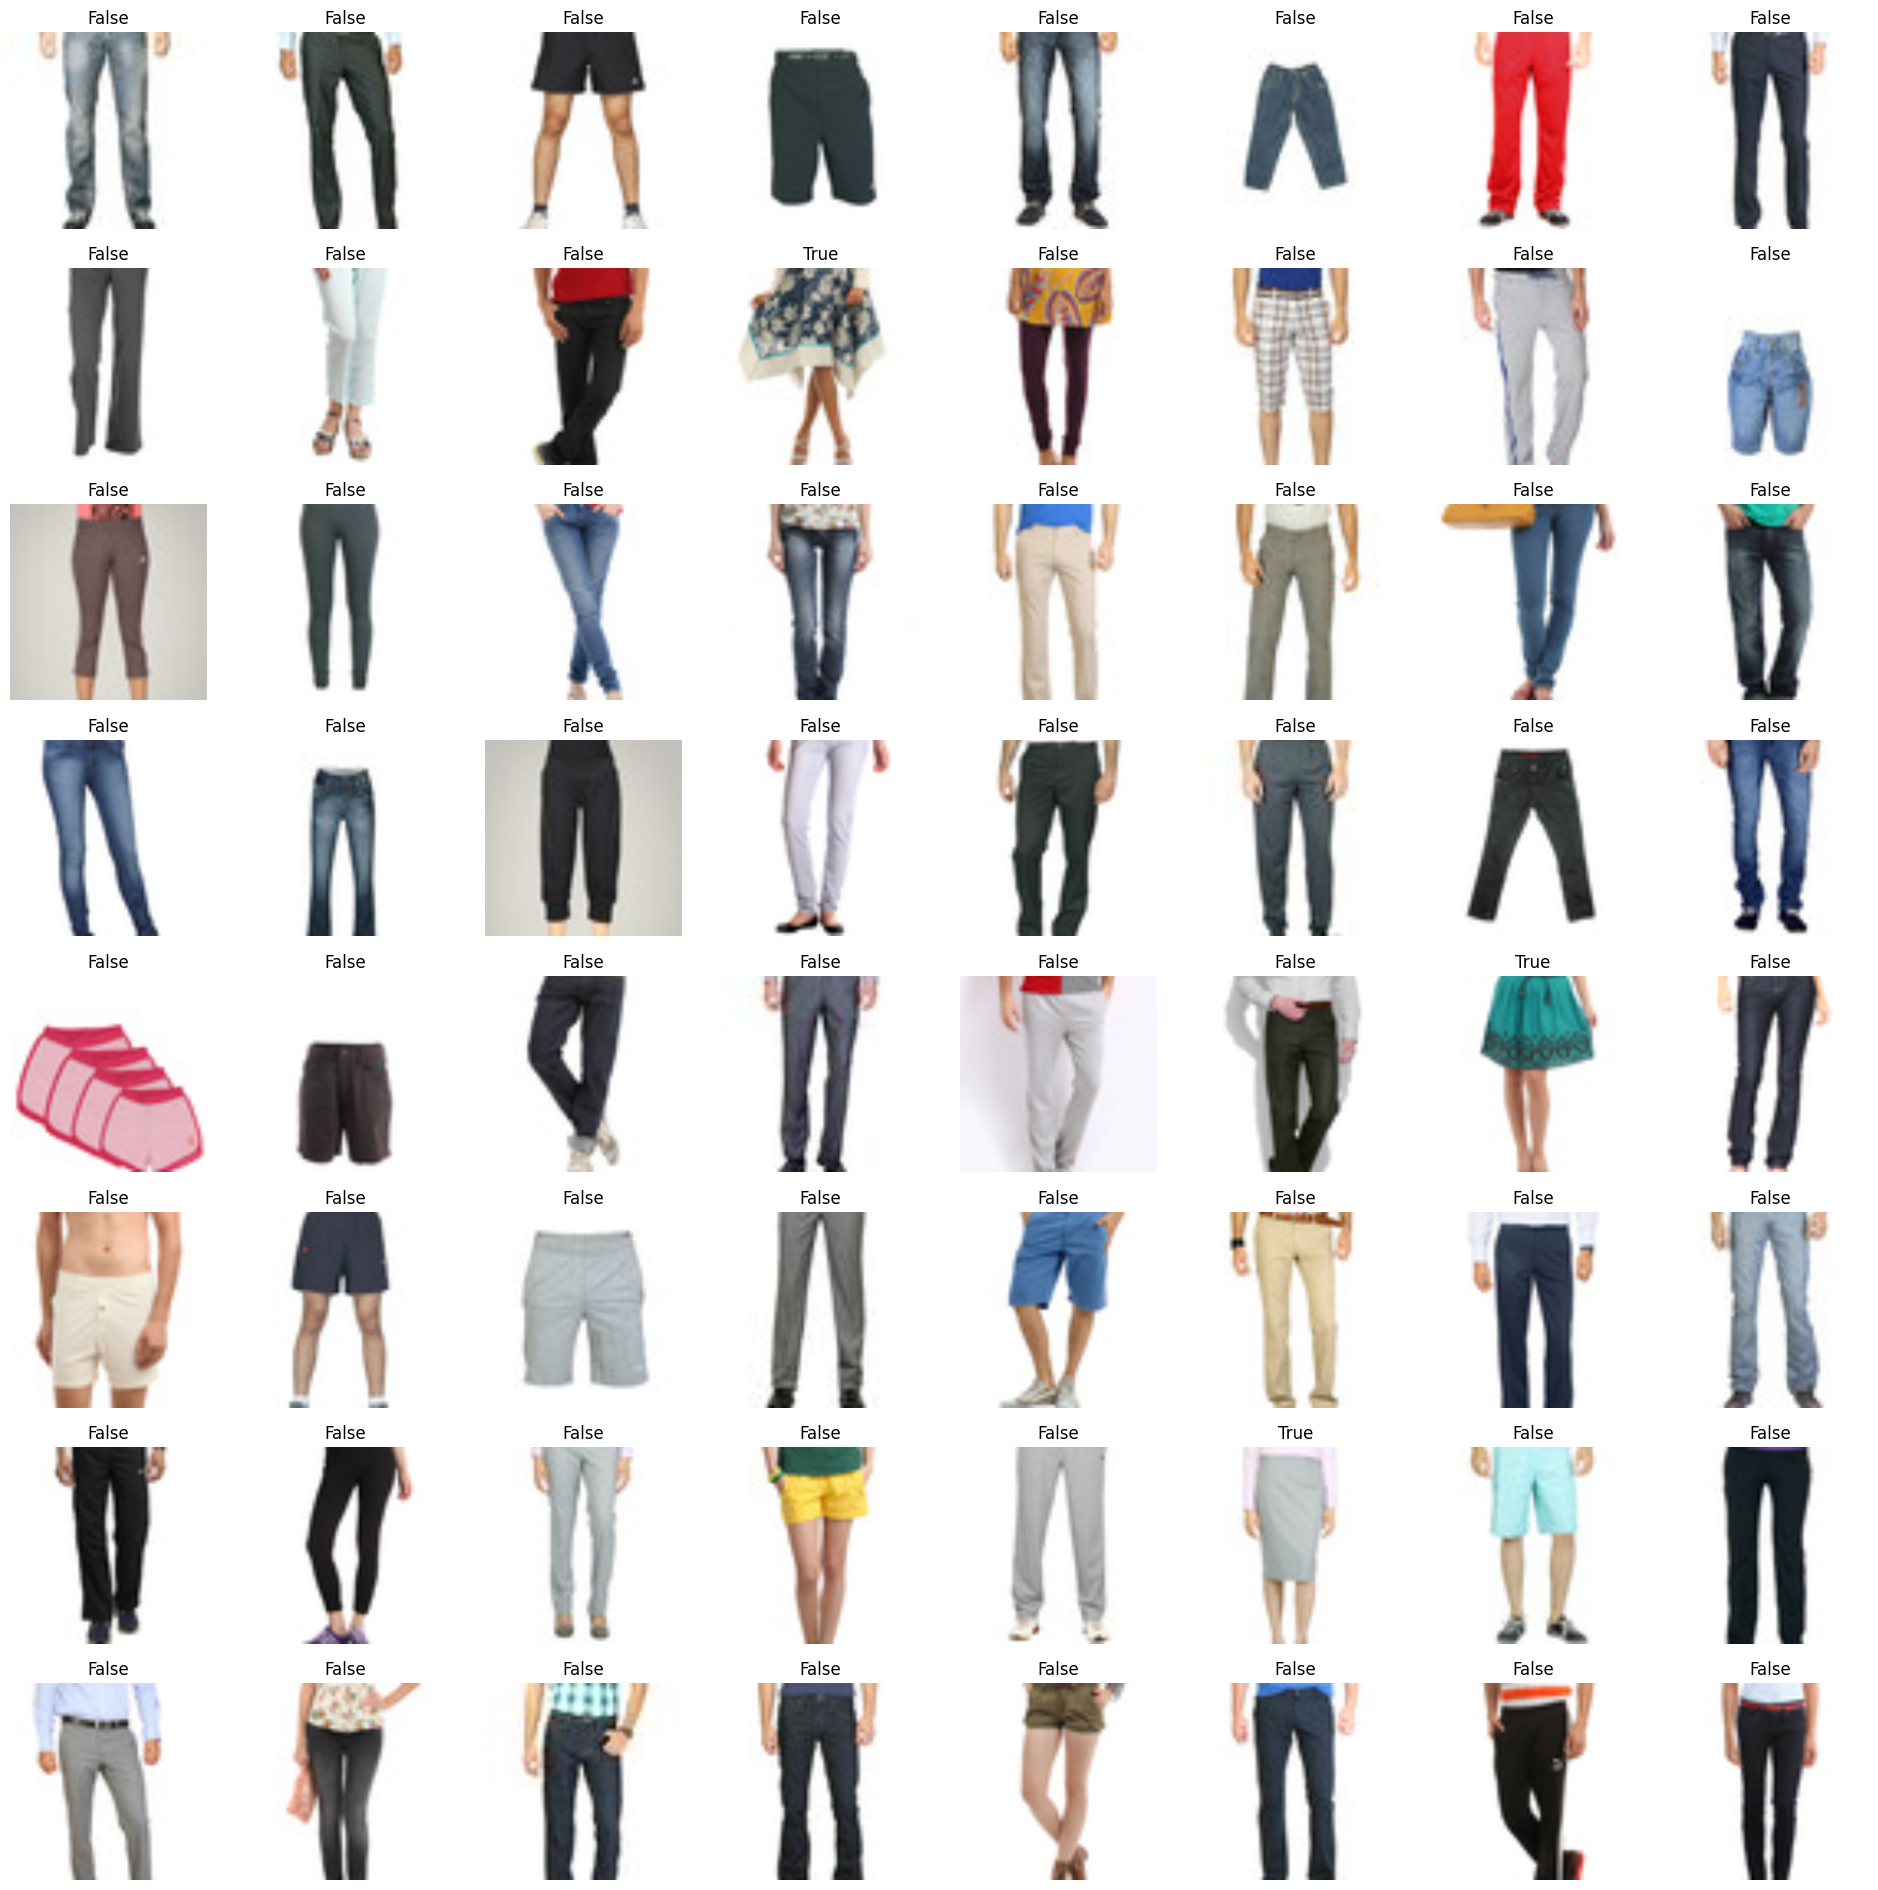

In [160]:
path='/kaggle/working/bottomwear'
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_skirt,
    item_tfms=Resize(192))
dls.show_batch(max_n=100)

... and train our model, a resnet18 (to keep it small and fast):

In [165]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 204MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.176539,0.559856,0.251073,03:36


epoch,train_loss,valid_loss,error_rate,time
0,0.730447,0.330449,0.135193,05:23
1,0.584861,0.256602,0.070815,05:29
2,0.434024,0.153728,0.040773,05:23
3,0.314333,0.116473,0.019313,05:29
4,0.246719,0.118161,0.025751,05:21


Now we can export our trained `Learner`. This contains all the information needed to run the model:

In [175]:
learn.export('model.pkl')

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

In [13]:
from fastai.vision.all import *
learn = load_learner('modelfashion.pkl')
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}


In [14]:
!pip install gradio
!pip install dill==0.3.1.1
!pip install pyarrow==3.0.0
!pip install jupyter-lsp==2.0.0
!pip install numpy==1.16.0
!pip install scipy==1.7.3
!pip install typing-extensions==3.6.6
!pip install packaging==23.1
!pip install pydantic==1.8.1

  Using cached pyarrow-3.0.0.tar.gz (682 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [839 lines of output]
      Ignoring numpy: markers 'python_version < "3.9"' don't match your environment
        Obtaining dependency information for cython>=0.29 from https://files.pythonhosted.org/packages/f9/bd/e8a1d26d04c08a67bcc383f2ea5493a4e77f37a8770ead00a238b08ad729/Cython-3.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
        Using cached Cython-3.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
        Using cached numpy-1.19.4.zip (7.3 MB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Preparing m

In [17]:
import gradio as gr
from pydantic import BaseModel
gr.Interface(fn=predict, inputs=gr.inputs.Image(), outputs=gr.outputs.Label().launch(share=True))
# demo.launch()

ImportError: cannot import name 'RootModel' from 'pydantic' (/opt/conda/lib/python3.10/site-packages/pydantic/__init__.cpython-310-x86_64-linux-gnu.so)

In [18]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch()


ImportError: cannot import name 'RootModel' from 'pydantic' (/opt/conda/lib/python3.10/site-packages/pydantic/__init__.cpython-310-x86_64-linux-gnu.so)